In [1]:
import pandas as pd

In [2]:
file_path = 'avianHabitat.csv'
df = pd.read_csv(file_path) #open and read file
column_name = 'LHt' #we choose the culumn according to the variable
filtered_df = df[[column_name]][df[column_name] != 0] #we leave the desired column and delete the rows from 0
print(filtered_df)  # Filtered Data Frame

      LHt
1     1.0
22    0.2
25    0.4
40    0.1
41    0.3
...   ...
1062  0.6
1063  0.3
1064  0.5
1066  0.6
1067  0.7

[714 rows x 1 columns]


In [3]:
min_value = filtered_df[column_name].min()#Minimum Value
max_value = filtered_df[column_name].max()#Maximum Value
print(f"Минимальное значение: {min_value}")
print(f"Максимальное значение: {max_value}")

Минимальное значение: 0.01
Максимальное значение: 1.3


In [4]:
range_value = max_value - min_value # the scope of the distribution
print(f"Scope of distribution: {range_value}")

Scope of distribution: 1.29


In [5]:
mean_value = filtered_df[column_name].mean() #Mean value
print(f"Mean Value: {mean_value}")

Mean Value: 0.4023949579831933


In [6]:
median_value = filtered_df[column_name].median() #Median
print(f"Median: {median_value}")

Median: 0.4


In [9]:
mode_value = filtered_df[column_name].mode()[0] # Mode Value
print(f"Mode: {mode_value}")

Mode: 0.3


In [11]:
variance = filtered_df[column_name].var() #variance
print(f"variance: {variance}")

variance: 0.05241823930133062


In [13]:
std_deviation = filtered_df[column_name].std() #standard deviation
print(f"standard deviation: {std_deviation}")

standard deviation: 0.2289502987578977


In [14]:
q1 = filtered_df[column_name].quantile(0.25) #First quartile
q3 = filtered_df[column_name].quantile(0.75) #Third quartile
print(f"First quartile (Q1): {q1}")
print(f"Third quartile (Q3): {q3}")

First quartile (Q1): 0.2
Third quartile (Q3): 0.5


In [15]:
iqr = q3 - q1 	#interquartile range
print(f"interquartile range (IQR): {iqr}")

interquartile range (IQR): 0.3


In [16]:
skewness = filtered_df[column_name].skew() #asymmetry
print(f"Asymmetry: {skewness}")

Asymmetry: 0.690557877829945


In [17]:
kurtosis = filtered_df[column_name].kurtosis() #kurtosis
print(f"kurtosis: {kurtosis}")

kurtosis: 0.22386026857057129


In [18]:
import pandas as pd
import matplotlib.pyplot as plt

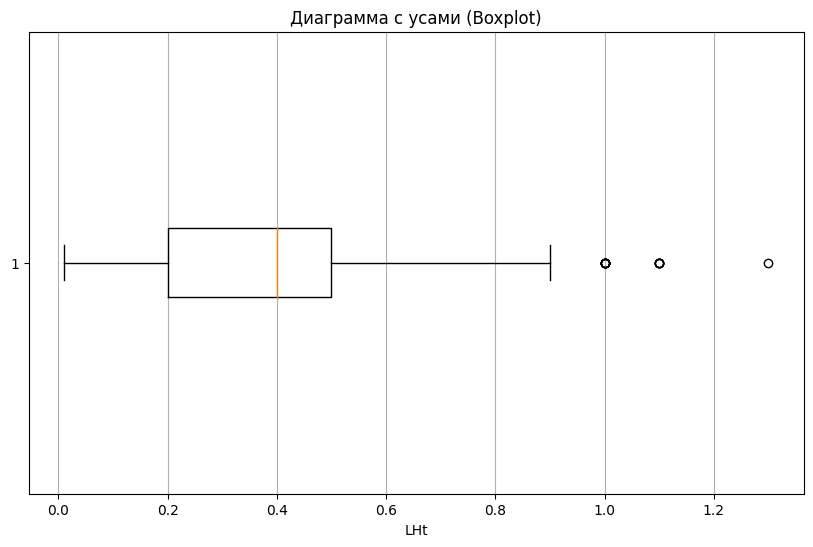

In [19]:
plt.figure(figsize=(10, 6))
plt.boxplot(filtered_df[column_name], vert=False) # диаграмма с усами (boxplot)
plt.title('Диаграмма с усами (Boxplot)')
plt.xlabel(column_name)
plt.grid(axis='x')
plt.show()

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

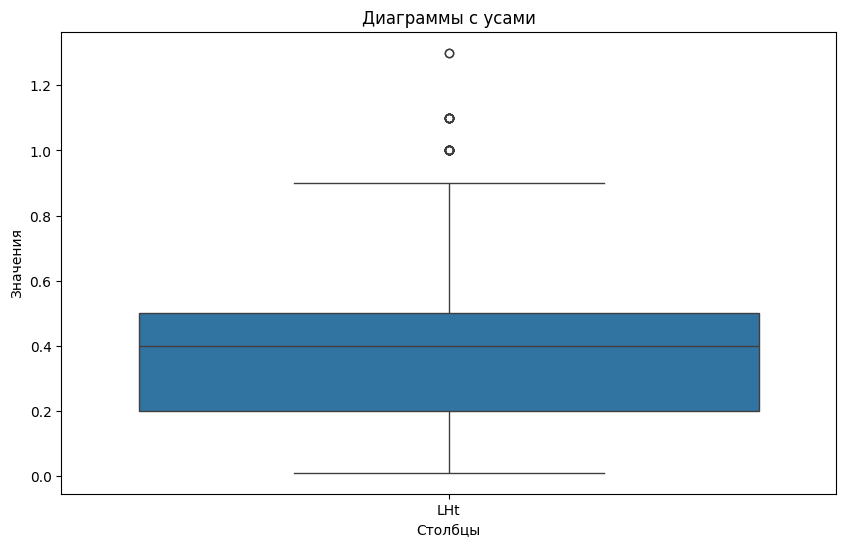

In [32]:
combined_df = pd.concat([filtered_df[column_name], filtered_df[column_name]], axis=1) # new Data Frame for visualization
combined_df.columns = [column_name, column_name]
combined_df_melted = combined_df.melt(var_name='Column', value_name='Value') # Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Column', y='Value', data=combined_df_melted)
plt.title('Диаграммы с усами')
plt.xlabel('Столбцы')
plt.ylabel('Значения')
plt.show()

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
data = filtered_df[column_name].sort_values()
n = len(data)
y = np.arange(1, n + 1) / n # empirical distribution function

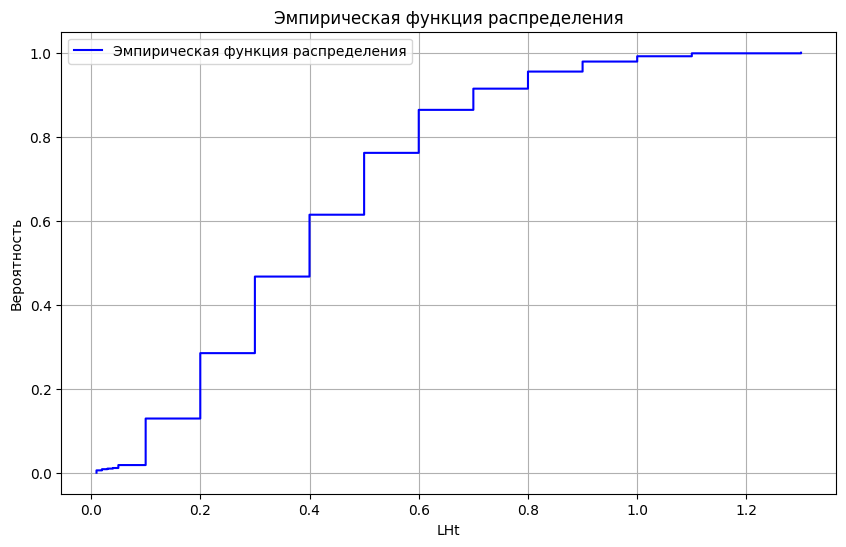

In [36]:
plt.figure(figsize=(10, 6))
plt.step(data, y, where='post', label='Эмпирическая функция распределения', color='blue') #empirical distribution graph
plt.title('Эмпирическая функция распределения')
plt.xlabel(column_name)
plt.ylabel('Вероятность')
plt.grid()
plt.legend()
plt.show()

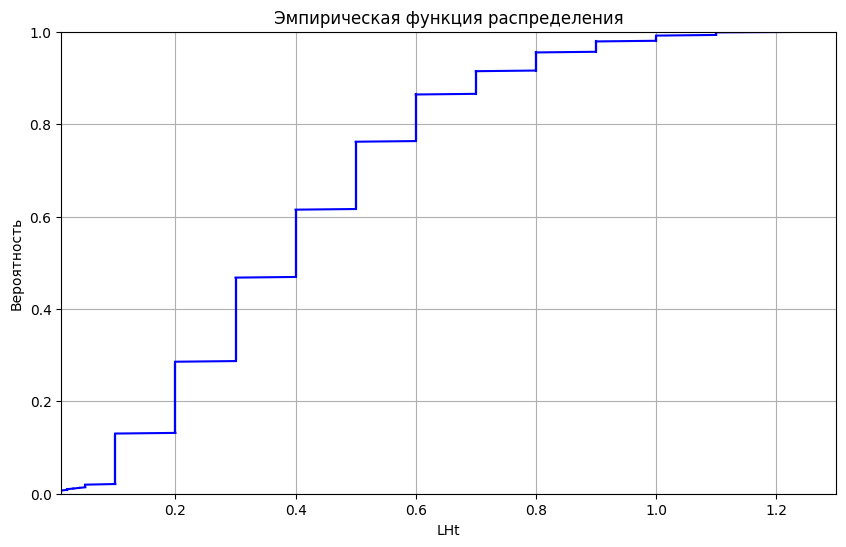

In [38]:
data = filtered_df[column_name].sort_values().values
n = len(data)
# empirical distribution function manually
y = np.arange(1, n + 1) / n  # probabilities
x = data  # sorted data
plt.figure(figsize=(10, 6))
for i in range(1, n):
    plt.plot([x[i - 1], x[i]], [y[i - 1], y[i]], color='blue')  # horizontal line
plt.plot([x[-1], x[-1]], [y[-1], 1], color='blue')# adding the last segment from the last value to
plt.title('Эмпирическая функция распределения')
plt.xlabel(column_name)
plt.ylabel('Вероятность')
plt.grid()
plt.xlim([min(x), max(x)])
plt.ylim([0, 1])
plt.show()


In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


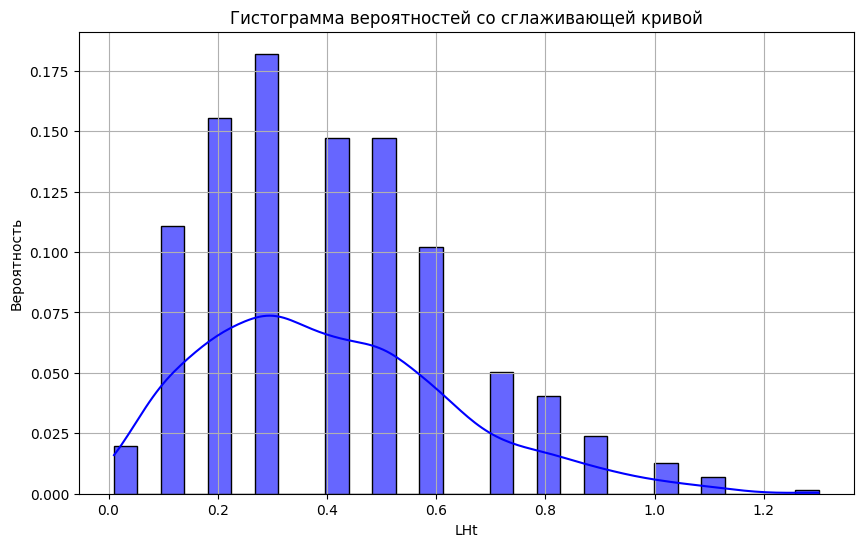

In [40]:
# probability histogram and smoothing curve
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df[column_name], bins=30, kde=True, stat='probability', color='blue', alpha=0.6)
plt.title('Гистограмма вероятностей со сглаживающей кривой')
plt.xlabel(column_name)
plt.ylabel('Вероятность')
plt.grid()
plt.show()

In [41]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt


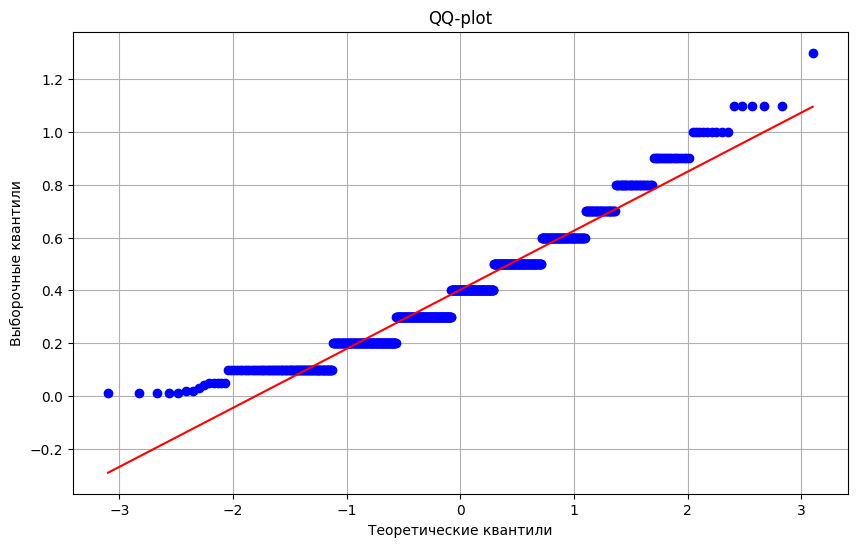

In [42]:
# QQ-plot
plt.figure(figsize=(10, 6))
stats.probplot(filtered_df[column_name], dist="norm", plot=plt)
plt.title('QQ-plot')
plt.xlabel('Теоретические квантили')
plt.ylabel('Выборочные квантили')
plt.grid()
plt.show()